# Review of Experimental Results for NARMA-10

In [131]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import make_interp_spline
import time

In [132]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('NARMA-experiment-' + str(df[0]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[0]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [168]:
studies = studies.sort_values(by=1)
studies = studies.reset_index(drop=True)
studies.head(20)

0         1                                                  2  \
0   study_247A  0.030781  FrozenTrial(number=130, values=[0.030781299010...   
1   study_246A  0.031043  FrozenTrial(number=147, values=[0.031042941682...   
2   study_1469  0.031134  FrozenTrial(number=149, values=[0.031133951295...   
3   study_147A  0.031401  FrozenTrial(number=149, values=[0.031401102848...   
4   study_8469  0.031532  FrozenTrial(number=91, values=[0.0315321701939...   
5   study_357A  0.031566  FrozenTrial(number=120, values=[0.031566062336...   
6   study_356A  0.031761  FrozenTrial(number=97, values=[0.0317608161307...   
7   study_2569  0.031863  FrozenTrial(number=114, values=[0.031862755175...   
8   study_256A  0.031953  FrozenTrial(number=108, values=[0.031952781038...   
9   study_857A  0.032416  FrozenTrial(number=126, values=[0.032416113478...   
10  study_8569  0.032475  FrozenTrial(number=136, values=[0.032474910395...   
11  study_1579  0.032559  FrozenTrial(number=114, values=[0.032558800168...   
12  study_146A  0.032880  FrozenTrial(number=147, values=[0.032880426487...   
13  study_346B  0.033014  FrozenTrial(number=114, values=[0.033013962411...   
14  study_356B  0.033020  FrozenTrial(number=113, values=[0.033020088707...   
15  study_2579  0.033115  FrozenTrial(number=137, values=[0.033115392700...   
16  study_856A  0.033131  FrozenTrial(number=146, values=[0.033131127639...   
17  study_157A  0.033217  FrozenTrial(number=148, values=[0.033216527577...   
18  study_847A  0.033362  FrozenTrial(number=149, values=[0.033362062499...   
19  study_3569  0.033661  FrozenTrial(number=132, values=[0.033661162466...   

                                                    3  
0   [FrozenTrial(number=130, values=[0.03078129901...  
1   [FrozenTrial(number=147, values=[0.03104294168...  
2   [FrozenTrial(number=149, values=[0.03113395129...  
3   [FrozenTrial(number=149, values=[0.03140110284...  
4   [FrozenTrial(number=91, values=[0.031532170193...  
5   [FrozenTrial(number=120, values=[0.03156606233...  
6   [FrozenTrial(number=97, values=[0.031760816130...  
7   [FrozenTrial(number=114, values=[0.03186275517...  
8   [FrozenTrial(number=108, values=[0.03195278103...  
9   [FrozenTrial(number=126, values=[0.03241611347...  
10  [FrozenTrial(number=136, values=[0.03247491039...  
11  [FrozenTrial(number=114, values=[0.03255880016...  
12  [FrozenTrial(number=147, values=[0.03288042648...  
13  [FrozenTrial(number=114, values=[0.03301396241...  
14  [FrozenTrial(number=113, values=[0.03302008870...  
15  [FrozenTrial(number=137, values=[0.03311539270...  
16  [FrozenTrial(number=146, values=[0.03313112763...  
17  [FrozenTrial(number=148, values=[0.03321652757...  
18  [FrozenTrial(number=149, values=[0.03336206249...  
19  [FrozenTrial(number=132, values=[0.03366116246...

## Confirm Trial Results
Make sure the above results can be duplicated

In [134]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        rmse = 100
        mae0 = 100
        r20 = 0
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        rmse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return rmse, mae0, r20

def narma10(x):
    """ tenth-order NARMA system applied to the input signal
    """
    size = len(x)
    y = np.zeros(x.shape)
    for n in range(10,size):
            y[n] = 0.3*y[n-1] + 0.05*y[n-1]*(y[n-1]+y[n-2]+y[n-3] +y[n-4]+y[n-5]+y[n-6]+y[n-7]+y[n-8]+y[n-9]+y[n-10])+ 1.5*x[n-10]*x[n-1] + 0.1
    return y

def get_esn_data(x,y,trainsize,testsize,inscale=1.,inshift=0.):
        """ returns trainin, trainout, testin, testout
        """
        skip = 50 # NARMA initialization
        trainin = x[skip:skip+trainsize]
        trainin.shape = 1,-1
        trainout = y[skip:skip+trainsize]
        trainout.shape = 1,-1
        testin = x[skip+trainsize:skip+trainsize+testsize]
        testin.shape = 1,-1
        testout = y[skip+trainsize:skip+trainsize+testsize]
        testout.shape = 1,-1
        return trainin, trainout, testin, testout

#### Generate Data

(0.2, 0.75)

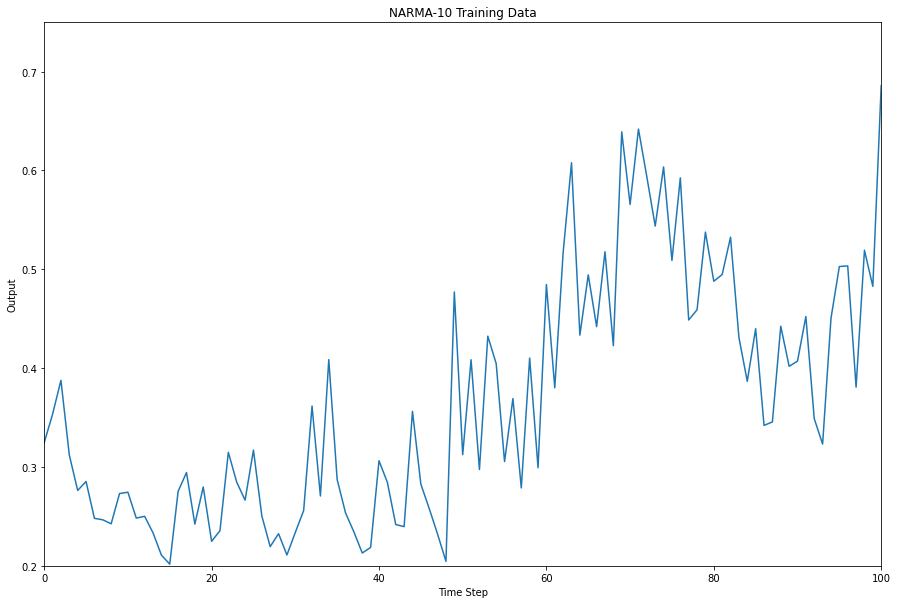

In [208]:
#Generate Data
trainsize = 1200
testsize = 2200

# generate train/test signals
size = trainsize+testsize+50
np.random.seed(0)
x = (np.random.uniform(0,0.5, size)).reshape(-1,1) #from the text
y = (narma10(x)).reshape(-1,1)               #from the text

# create in/outs with bias input
trainin, trainout, testin, testout = get_esn_data(x,y,trainsize,testsize)
trainin = np.transpose(trainin)
trainout = trainout.reshape(-1,1)
testin = np.transpose(testin)
testout = testout.reshape(-1,1)

z = np.arange(0, trainsize)

plt.figure(figsize=(15, 10))
plt.plot(z, trainout[:,0])
plt.xlabel('Time Step')
plt.ylabel('Output')
plt.title('NARMA-10 Training Data')
plt.xlim(0,100)
plt.ylim(0.20,0.75)

#### Trial vs Recreated

In [161]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 200
startState = np.zeros((1,N))

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    
    model.sv = sv
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = trainin, teacher=trainout, washout=washout)

    model.sv = 0
    predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

    nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(nrmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_247A
RMSE: 0.030781299010616676, 0.030781299010616676
MAE: 0.024531952204611716, 0.024531952204611716
R2: 0.9047277411210047, 0.9047277411210047

study_246A
RMSE: 0.031042941682152533, 0.031042941682152533
MAE: 0.024582318889242942, 0.024582318889242942
R2: 0.9031012191237925, 0.9031012191237925

study_1469
RMSE: 0.0311339512954238, 0.0311339512954238
MAE: 0.024608306317323733, 0.024608306317323733
R2: 0.9025322235865123, 0.9025322235865123

study_147A
RMSE: 0.03140110284898583, 0.03140110284898583
MAE: 0.02474787648583107, 0.02474787648583107
R2: 0.9008523608005048, 0.9008523608005048

study_8469
RMSE: 0.03153217019399775, 0.03153217019399775
MAE: 0.024633137944263007, 0.024633137944263007
R2: 0.9000229543735185, 0.9000229543735185

study_357A
RMSE: 0.03156606233617537, 0.03156606233617537
MAE: 0.024798106735038006, 0.024798106735038006
R2: 0.8998079195539659, 0.8998079195539659

study_356A
RMSE: 0.031760816130778156, 0.031760816130778156
MAE: 0.02500502281378534, 0.025005022813

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.
### Time complexity of different model instantiations

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [71]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,studies.shape[0]): #pick a model
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

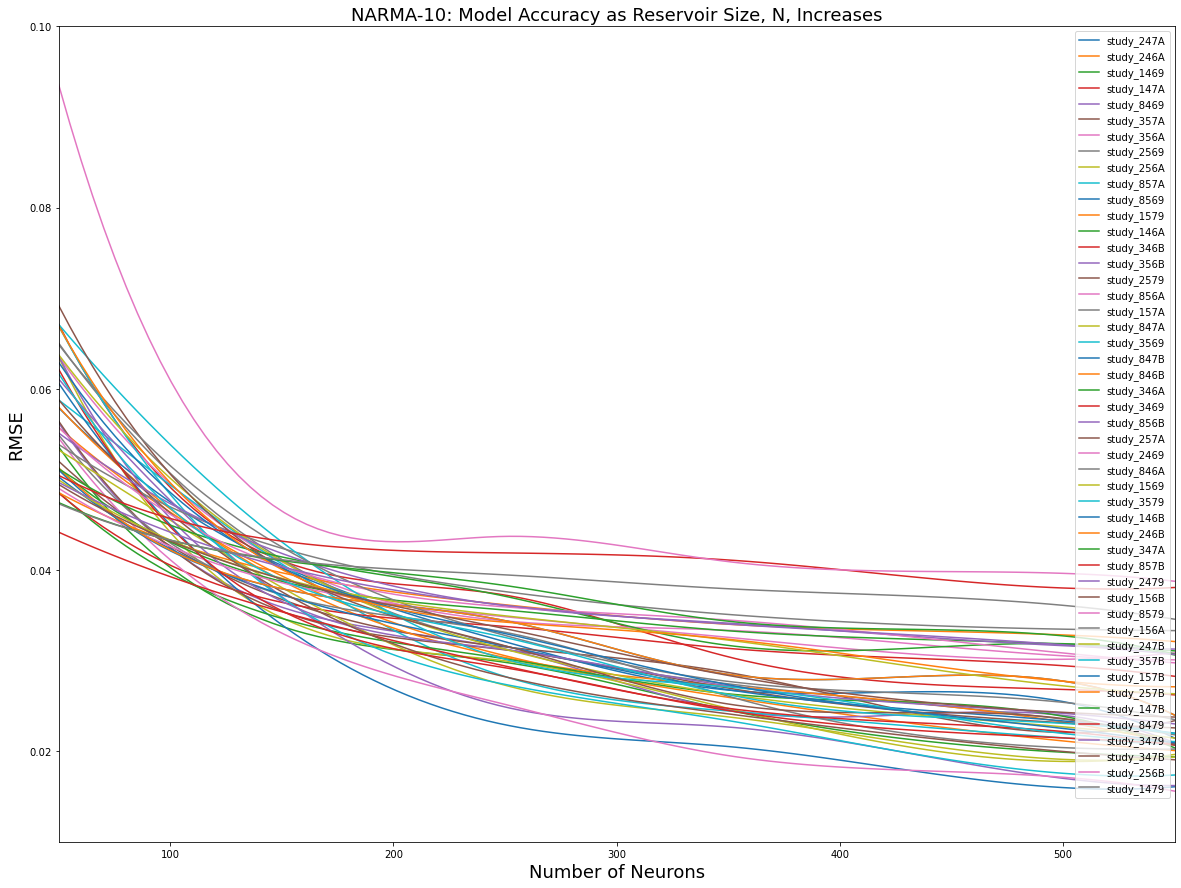

In [73]:
#add to plot
plt.figure(figsize=(20, 15))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend()
plt.xlim([50,550])
plt.ylim([0.01,0.1])
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('Number of Neurons', fontsize=18)
plt.title('NARMA-10: Model Accuracy as Reservoir Size, N, Increases', fontsize=18)
plt.show()

In [74]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

study_247A  study_246A  study_1469  study_147A  study_8469  study_357A  \
0    0.057911    0.055728    0.053600    0.067157    0.056252    0.052015   
1    0.040492    0.039347    0.033776    0.041015    0.035895    0.036757   
2    0.032083    0.030540    0.029811    0.037233    0.031282    0.031509   
3    0.026746    0.025947    0.024538    0.030420    0.024552    0.028693   
4    0.026554    0.022515    0.020817    0.027238    0.024244    0.023426   
5    0.021449    0.020072    0.019378    0.026218    0.020929    0.023364   

   study_356A  study_2569  study_256A  study_857A  study_8569  study_1579  \
0    0.063581    0.065052    0.063515    0.058774    0.060629    0.057994   
1    0.040913    0.041168    0.034722    0.040674    0.033957    0.038833   
2    0.034385    0.031603    0.029973    0.028245    0.022919    0.030343   
3    0.033344    0.027433    0.024727    0.024442    0.020516    0.027189   
4    0.031473    0.024885    0.019782    0.022410    0.017237    0.024894   
5    0.030088    0.021816    0.019641    0.020714    0.016075    0.020855   

   study_146A  study_346B  study_356B  study_2579  study_856A  study_157A  \
0    0.048585    0.048490    0.061104    0.056446    0.054570    0.054923   
1    0.034655    0.036429    0.037051    0.035447    0.033035    0.037257   
2    0.030197    0.033767    0.024881    0.031187    0.025167    0.033129   
3    0.026330    0.031349    0.022669    0.026970    0.019513    0.026074   
4    0.025215    0.030085    0.018929    0.023981    0.017732    0.021328   
5    0.020378    0.028269    0.016205    0.022574    0.015594    0.020236   

   study_847A  study_3569  study_847B  study_846B  study_346A  study_3469  \
0    0.053254    0.066942    0.050283    0.048535    0.051133    0.044179   
1    0.038075    0.036951    0.037301    0.039696    0.038742    0.035388   
2    0.027281    0.027376    0.031593    0.036163    0.035579    0.029405   
3    0.023787    0.023379    0.026785    0.034015    0.033291    0.024733   
4    0.020253    0.019030    0.024291    0.033202    0.032239    0.022950   
5    0.019357    0.017371    0.021993    0.032105    0.031074    0.020664   

   study_856B  study_257A  study_2469  study_846A  study_1569  study_3579  \
0    0.063591    0.058793    0.049021    0.053868    0.063775    0.067114   
1    0.036542    0.037597    0.038596    0.042399    0.040992    0.043103   
2    0.031229    0.028216    0.034842    0.037616    0.031255    0.030162   
3    0.027222    0.024121    0.032570    0.035095    0.026266    0.027099   
4    0.024982    0.021167    0.030453    0.033786    0.023701    0.023667   
5    0.023013    0.019055    0.030854    0.033310    0.021452    0.021064   

   study_146B  study_246B  study_347A  study_857B  study_2479  study_156B  \
0    0.051055    0.051299    0.051178    0.062180    0.055128    0.069212   
1    0.037927    0.037940    0.041441    0.035497    0.041833    0.040204   
2    0.034410    0.034414    0.037104    0.029211    0.036065    0.031638   
3    0.028472    0.028478    0.031673    0.024488    0.034135    0.025207   
4    0.028371    0.028374    0.031584    0.022067    0.032381    0.024263   
5    0.023987    0.023990    0.030624    0.020783    0.031273    0.020726   

   study_8579  study_156A  study_247B  study_357B  study_157B  study_257B  \
0    0.055733    0.064901    0.049950    0.061693    0.062931    0.066939   
1    0.040383    0.042538    0.039083    0.038918    0.040269    0.040061   
2    0.035929    0.032776    0.034945    0.032555    0.032988    0.034247   
3    0.034477    0.027703    0.032262    0.026247    0.027338    0.032358   
4    0.032142    0.026212    0.028736    0.023659    0.023853    0.029127   
5    0.029755    0.023488    0.026340    0.021966    0.020919    0.027111   

   study_147B  study_8479  study_3479  study_347B  study_256B  study_1479  
0    0.047442    0.050444    0.049669    0.049446    0.093604    0.047319  
1    0.041037    0.043186    0.040356    0.039014    0.046502    0.0411

In [75]:
plotInfo3Avg = plotInfo3.mean(axis=0)
plotInfo3Avg = plotInfo3Avg.sort_values()

In [76]:
plotInfo3_10 = plotInfo3[[plotInfo3Avg.index[0], plotInfo3Avg.index[1], plotInfo3Avg.index[2], plotInfo3Avg.index[3], plotInfo3Avg.index[4], plotInfo3Avg.index[5], plotInfo3Avg.index[6], plotInfo3Avg.index[7], plotInfo3Avg.index[8],plotInfo3Avg.index[9]]]

In [77]:
plotInfo3_10.head(10)

study_856A  study_8569  study_3469  study_356B  study_1469  study_847A  \
0    0.054570    0.060629    0.044179    0.061104    0.053600    0.053254   
1    0.033035    0.033957    0.035388    0.037051    0.033776    0.038075   
2    0.025167    0.022919    0.029405    0.024881    0.029811    0.027281   
3    0.019513    0.020516    0.024733    0.022669    0.024538    0.023787   
4    0.017732    0.017237    0.022950    0.018929    0.020817    0.020253   
5    0.015594    0.016075    0.020664    0.016205    0.019378    0.019357   

   study_146A  study_257A  study_3569  study_847B  
0    0.048585    0.058793    0.066942    0.050283  
1    0.034655    0.037597    0.036951    0.037301  
2    0.030197    0.028216    0.027376    0.031593  
3    0.026330    0.024121    0.023379    0.026785  
4    0.025215    0.021167    0.019030    0.024291  
5    0.020378    0.019055    0.017371    0.021993

In [78]:
orderedStudies = pd.DataFrame()
for i in plotInfo3Avg.index:
    orderedStudies = pd.concat([orderedStudies, studies.loc[studies.iloc[:,0] == i]])
orderedStudies = orderedStudies.reset_index(drop=True)
orderedStudies.head(10)

0         1                                                  2  \
0  study_856A  0.033131  FrozenTrial(number=146, values=[0.033131127639...   
1  study_8569  0.032475  FrozenTrial(number=136, values=[0.032474910395...   
2  study_3469  0.034159  FrozenTrial(number=148, values=[0.034158693485...   
3  study_356B  0.033020  FrozenTrial(number=113, values=[0.033020088707...   
4  study_1469  0.031134  FrozenTrial(number=149, values=[0.031133951295...   
5  study_847A  0.033362  FrozenTrial(number=149, values=[0.033362062499...   
6  study_146A  0.032880  FrozenTrial(number=147, values=[0.032880426487...   
7  study_257A  0.034197  FrozenTrial(number=106, values=[0.034196812134...   
8  study_3569  0.033661  FrozenTrial(number=132, values=[0.033661162466...   
9  study_847B  0.033822  FrozenTrial(number=137, values=[0.033821569439...   

                                                   3  
0  [FrozenTrial(number=146, values=[0.03313112763...  
1  [FrozenTrial(number=136, values=[0.03247491039...  
2  [FrozenTrial(number=148, values=[0.03415869348...  
3  [FrozenTrial(number=113, values=[0.03302008870...  
4  [FrozenTrial(number=149, values=[0.03113395129...  
5  [FrozenTrial(number=149, values=[0.03336206249...  
6  [FrozenTrial(number=147, values=[0.03288042648...  
7  [FrozenTrial(number=106, values=[0.03419681213...  
8  [FrozenTrial(number=132, values=[0.03366116246...  
9  [FrozenTrial(number=137, values=[0.03382156943...

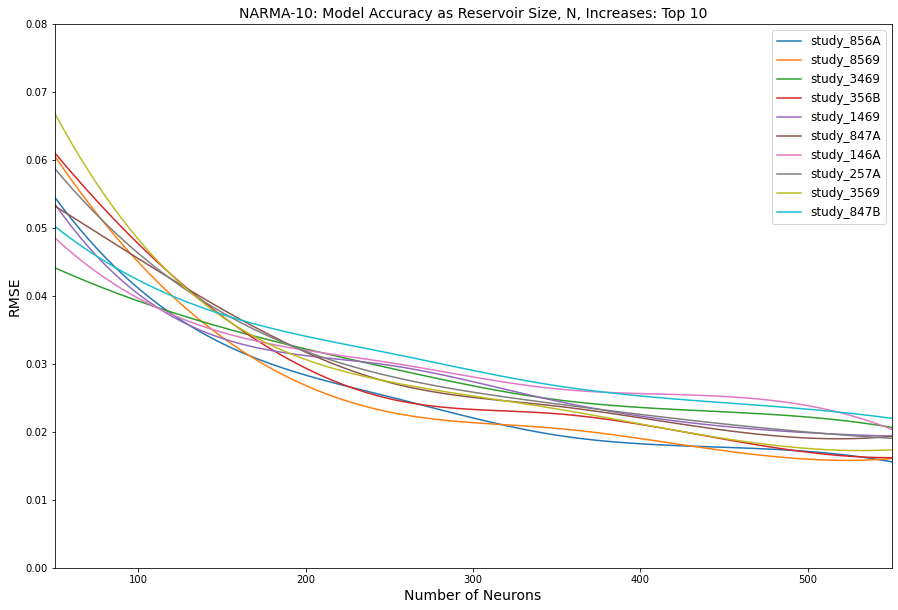

In [81]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3_10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,550])
plt.ylim([0,0.08])
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.title('NARMA-10: Model Accuracy as Reservoir Size, N, Increases: Top 10', fontsize=14)
plt.show()

# Time Complexity

In [82]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 250
x = np.arange(50,1550,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,10): #pick a model
    N = 50
    startState = np.zeros((1,N))
    p = orderedStudies.iloc[i,2].params['p']
    a = orderedStudies.iloc[i,2].params['a']
    dw = orderedStudies.iloc[i,2].params['dw']
    din = orderedStudies.iloc[i,2].params['din']
    sin = orderedStudies.iloc[i,2].params['sin']
    B = orderedStudies.iloc[i,2].params['B']
    isU2Y = orderedStudies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = orderedStudies.iloc[i,2].user_attrs['isY2Y']
    resFunc = orderedStudies.iloc[i,2].user_attrs['resFunc']
    outFunc = orderedStudies.iloc[i,2].user_attrs['outFunc']
    distribution = orderedStudies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[orderedStudies.iloc[i,0]])), axis=1)

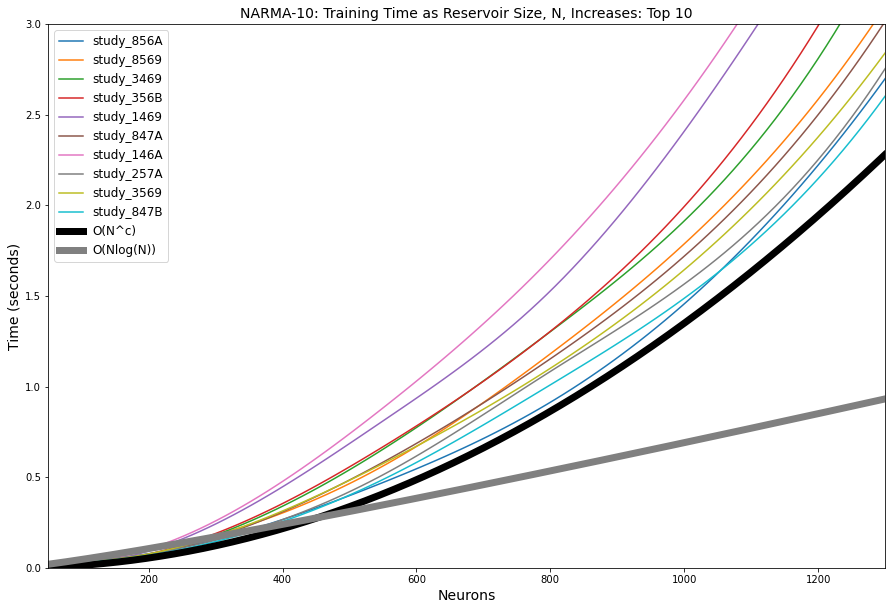

In [92]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimeTrain.columns[col])
    
n = np.arange(1,1300)
exponential = 0.00000135*np.power(n,2)
nlogn = 0.0001*n*np.log(n)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)
plt.plot(n,nlogn,label='O(Nlog(N))', color='#808080', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: Training Time as Reservoir Size, N, Increases: Top 10', fontsize=14)
plt.show()

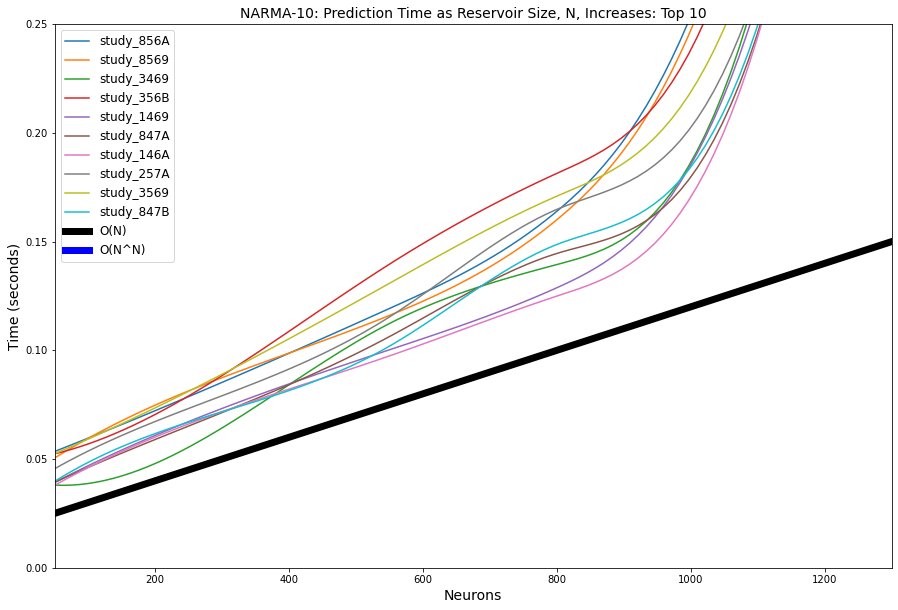

In [93]:
#add to plot
from scipy.special import factorial
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimePredict.columns[col])
    
n = np.arange(1,1350)
orderOfN = (0.0001*n)+0.02
nToN = 0.00001*factorial(n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)
plt.plot(n,nToN,label='O(N^N)', color='blue', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,0.25])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: Prediction Time as Reservoir Size, N, Increases: Top 10', fontsize=14)
plt.show()

In [824]:
plotInfo3TimePredict

study_856A  study_8569  study_3469  study_356B  study_1469  study_847A  \
0    0.059475    0.054676    0.035379    0.054724    0.037618    0.039622   
1    0.095634    0.088943    0.066919    0.090177    0.064868    0.066007   
2    0.122740    0.119817    0.093791    0.117420    0.090414    0.091635   
3    0.162381    0.161306    0.124925    0.156438    0.122809    0.130268   
4    0.252891    0.248650    0.207319    0.243048    0.195552    0.200799   
5    0.636296    0.655446    0.583617    0.615780    0.562720    0.573702   

   study_146A  study_257A  study_3569  study_847B  
0    0.038444    0.049814    0.053946    0.039397  
1    0.067219    0.082296    0.089705    0.068768  
2    0.090223    0.114324    0.118125    0.092688  
3    0.122724    0.156496    0.165511    0.137252  
4    0.196760    0.227046    0.237659    0.204771  
5    0.562883    0.602626    0.615870    0.502411

### Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [374]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
w = np.zeros((11,1))
n = np.zeros((11,1))
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo0 = pd.DataFrame()
plotInfo0TimeTrain = pd.DataFrame()
plotInfo0TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start

            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimeTrain = pd.concat((plotInfo0TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimePredict = pd.concat((plotInfo0TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

In [375]:
w

array([[0.03224912],
       [0.07047468],
       [0.12652443],
       [0.20469532],
       [0.32678444],
       [0.53582408],
       [0.70758113],
       [0.89634442],
       [1.09800708],
       [1.34999623],
       [1.61331265]])

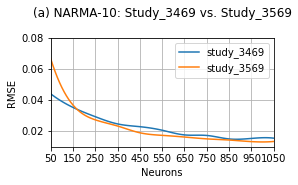

In [544]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_3469 vs. Study_3569\n')
plt.xlabel('Neurons')
plt.ylabel('RMSE')
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.08])
plt.grid()
plt.show()

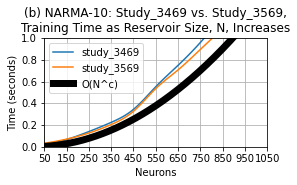

In [545]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b) NARMA-10: Study_3469 vs. Study_3569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

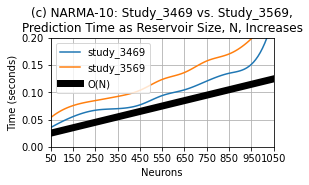

In [559]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: Study_3469 vs. Study_3569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## Same exact model with different activation function

In [403]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo1TimeTrain = pd.DataFrame()
plotInfo1TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo1TimeTrain = pd.concat((plotInfo1TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo1TimePredict = pd.concat((plotInfo1TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [404]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo1TimeTrain = plotInfo1TimeTrain.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo1TimePredict = plotInfo1TimePredict.rename(columns={"1": "study_3469", "2": "study_3569"})

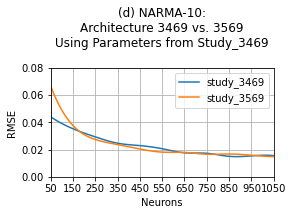

In [549]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(d) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3469\n')
plt.show()

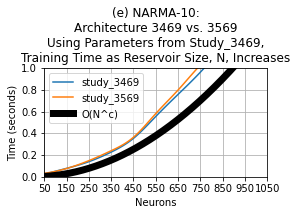

In [550]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

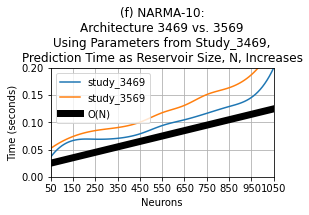

In [558]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [552]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo2TimeTrain = pd.DataFrame()
plotInfo2TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo2TimeTrain = pd.concat((plotInfo2TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo2TimePredict = pd.concat((plotInfo2TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [553]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo2TimeTrain = plotInfo2TimeTrain.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo2TimePredict = plotInfo2TimePredict.rename(columns={"1": "study_3469", "2": "study_3569"})

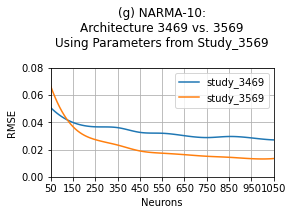

In [554]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3569\n')
plt.show()

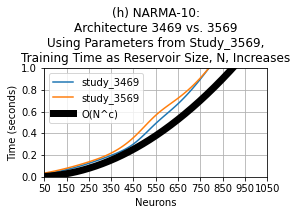

In [555]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

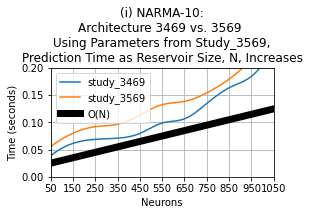

In [666]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10:\nArchitecture 3469 vs. 3569 \nUsing Parameters from Study_3569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## What parameters are controlling the influence of the reservoir activation

### spectral radius

In [312]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo22= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo22TimeTrain = pd.DataFrame()
plotInfo22TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo22 =            pd.concat((plotInfo22, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo22TimeTrain =   pd.concat((plotInfo22TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo22TimePredict = pd.concat((plotInfo22TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_3469
study_3569


In [313]:
plotInfo22 =            plotInfo22.rename(columns={"0": "study_3469 SR", "1": "study_3569 SR"})
plotInfo22TimeTrain =   plotInfo22TimeTrain.rename(columns={"0": "study_3469 SR", "1": "study_3569 SR"})
plotInfo22TimePredict = plotInfo22TimePredict.rename(columns={"0": "study_3469 SR", "1": "study_3569 SR"})

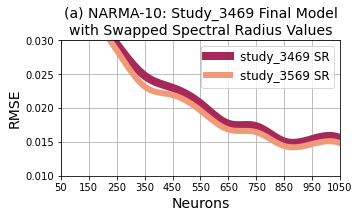

In [575]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo22.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_3469 Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.03])
plt.grid()
plt.show()

In [525]:
plotInfo22.iloc[9,0]-plotInfo22.iloc[9,1]

0.0007273143621510658

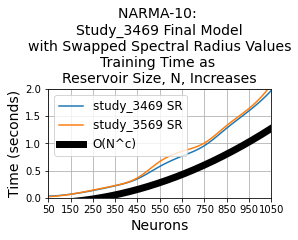

In [315]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo22TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

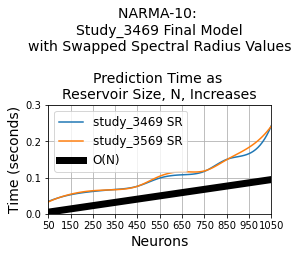

In [316]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo22TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Spectral Radius Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [474]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo23= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo23TimeTrain = pd.DataFrame()
plotInfo23TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    N = 50
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo23 =            pd.concat((plotInfo23, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo23TimeTrain =   pd.concat((plotInfo23TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo23TimePredict = pd.concat((plotInfo23TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_3469
0.03858946164449056
0.1332012176513672
0.2307048797607422
0.40375561714172364
0.6189934094746907
1.04034047467368
1.1563916683197022
1.5417371988296509
1.9161195414406913
2.4621341778681827
3.6475473403930665
study_3569
0.04173455238342285
0.13623792330423992
0.2581088701883952
0.426957639058431
0.6354065577189127
0.9542055470602853
1.2855668703715006
1.6453643015452795
2.1485613584518433
2.733852812222072
3.3917183876037598


In [475]:
plotInfo23 =            plotInfo23.rename(columns={"0": "study_3469 LR", "1": "study_3569 LR"})
plotInfo23TimeTrain =   plotInfo23TimeTrain.rename(columns={"0": "study_3469 LR", "1": "study_3569 LR"})
plotInfo23TimePredict = plotInfo23TimePredict.rename(columns={"0": "study_3469 LR", "1": "study_3569 LR"})

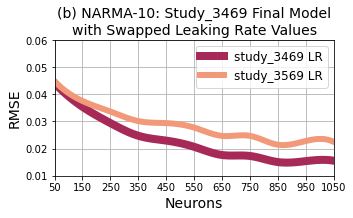

In [573]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo23.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) NARMA-10: Study_3469 Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.06])
plt.grid()
plt.show()

In [527]:
plotInfo23.iloc[9,1]-plotInfo23.iloc[9,0]

0.007395102528481242

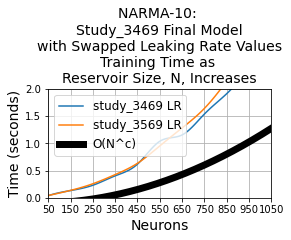

In [477]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo23TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

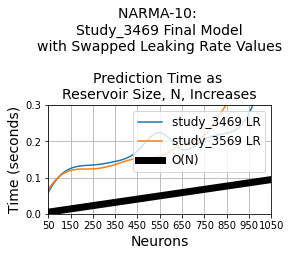

In [478]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo23TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [322]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo24= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo24TimeTrain = pd.DataFrame()
plotInfo24TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo24 =            pd.concat((plotInfo24, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo24TimeTrain =   pd.concat((plotInfo24TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo24TimePredict = pd.concat((plotInfo24TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_3469
study_3569


In [323]:
plotInfo24 =            plotInfo24.rename(columns={"0": "study_3469 dW", "1": "study_3569 dW"})
plotInfo24TimeTrain =   plotInfo24TimeTrain.rename(columns={"0": "study_3469 dW", "1": "study_3569 dW"})
plotInfo24TimePredict = plotInfo24TimePredict.rename(columns={"0": "study_3469 dW", "1": "study_3569 dW"})

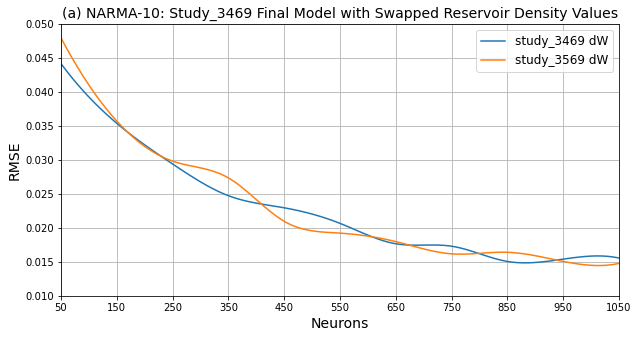

In [531]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo24.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_3469 Final Model with Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.05])
plt.grid()
plt.show()

In [532]:
plotInfo24.iloc[9,0]-plotInfo24.iloc[9,1]

0.00033051271370902746

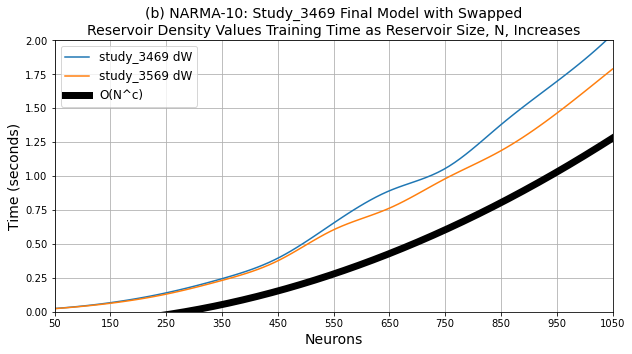

In [343]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo24TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) NARMA-10: Study_3469 Final Model with Swapped\nReservoir Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

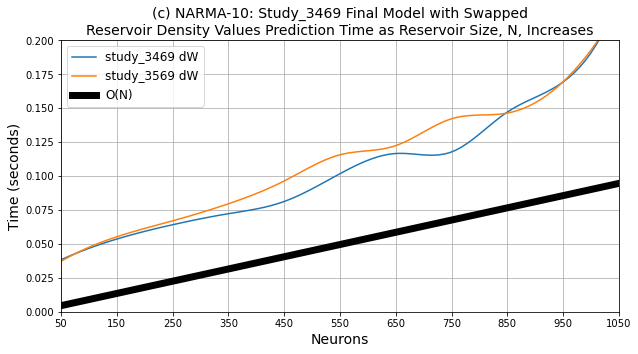

In [344]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo24TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: Study_3469 Final Model with Swapped\nReservoir Density Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [327]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo25= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo25TimeTrain = pd.DataFrame()
plotInfo25TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo25 =            pd.concat((plotInfo25, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo25TimeTrain =   pd.concat((plotInfo25TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo25TimePredict = pd.concat((plotInfo25TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_3469
study_3569


In [328]:
plotInfo25 =            plotInfo25.rename(columns={"0": "study_3469 dWin", "1": "study_3569 dWin"})
plotInfo25TimeTrain =   plotInfo25TimeTrain.rename(columns={"0": "study_3469 dWin", "1": "study_3569 dWin"})
plotInfo25TimePredict = plotInfo25TimePredict.rename(columns={"0": "study_3469 dWin", "1": "study_3569 dWin"})

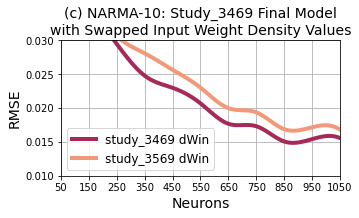

In [572]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo25.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25.columns[col], color=colors[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) NARMA-10: Study_3469 Final Model\nwith Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.03])
plt.grid()
plt.show()

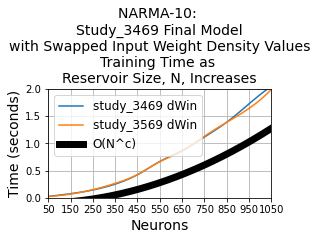

In [330]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo25TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

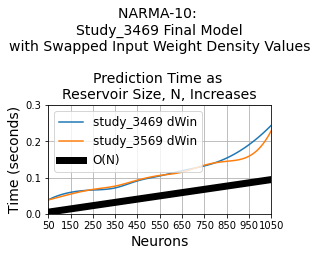

In [331]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo25TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [332]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo26= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo26TimeTrain = pd.DataFrame()
plotInfo26TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo26 =            pd.concat((plotInfo26, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo26TimeTrain =   pd.concat((plotInfo26TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo26TimePredict = pd.concat((plotInfo26TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_3469
study_3569


In [334]:
plotInfo26 =            plotInfo26.rename(columns={"0": "study_3469 sin", "1": "study_3569 sin"})
plotInfo26TimeTrain =   plotInfo26TimeTrain.rename(columns={"0": "study_3469 sin", "1": "study_3569 sin"})
plotInfo26TimePredict = plotInfo26TimePredict.rename(columns={"0": "study_3469 sin", "1": "study_3569 sin"})

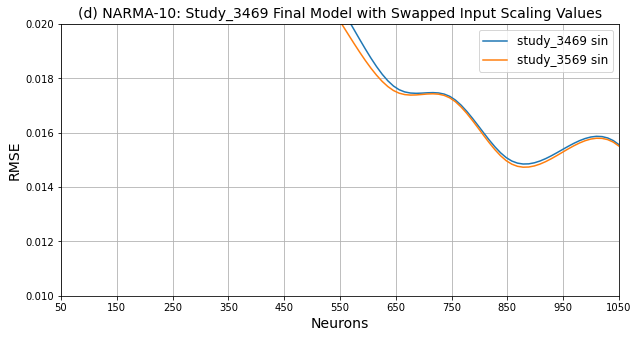

In [534]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo26.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) NARMA-10: Study_3469 Final Model with Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.02])
plt.grid()
plt.show()

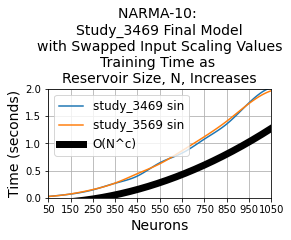

In [346]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo26TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

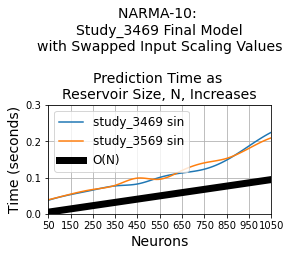

In [347]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo26TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [335]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo27= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo27TimeTrain = pd.DataFrame()
plotInfo27TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo27 =            pd.concat((plotInfo27, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo27TimeTrain =   pd.concat((plotInfo27TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo27TimePredict = pd.concat((plotInfo27TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_3469
study_3569


In [336]:
plotInfo27 =            plotInfo27.rename(columns={"0": "study_3469 Beta", "1": "study_3569 Beta"})
plotInfo27TimeTrain =   plotInfo27TimeTrain.rename(columns={"0": "study_3469 Beta", "1": "study_3569 Beta"})
plotInfo27TimePredict = plotInfo27TimePredict.rename(columns={"0": "study_3469 Beta", "1": "study_3569 Beta"})

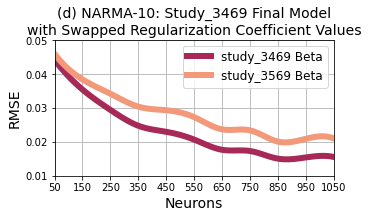

In [578]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo27.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27.columns[col], color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) NARMA-10: Study_3469 Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.05])
plt.grid()
plt.show()

In [530]:
plotInfo27.iloc[9,1]-plotInfo27.iloc[9,0]

0.005479031567473248

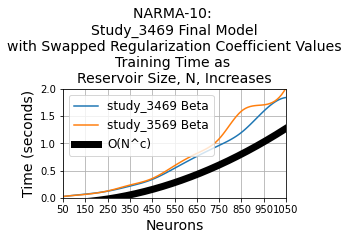

In [350]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo27TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

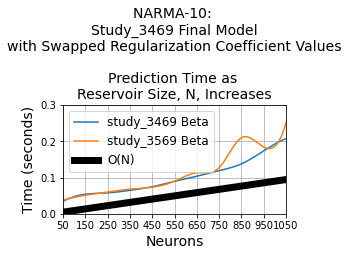

In [351]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo27TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [94]:
print(studies.loc[studies.iloc[:,0] == 'study_856A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_856A'].iloc[0,2].params

study_856A


{'p': 0.9057390526428688,
 'a': 0.9658701881107126,
 'dw': 0.11046693137423193,
 'din': 0.5708395323337219,
 'sin': 0.21692143018417046,
 'B': 0.0017872808358900506}

In [95]:
print(studies.loc[studies.iloc[:,0] == 'study_8569'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_8569'].iloc[0,2].params

study_8569


{'p': 0.8800335099405139,
 'a': 0.9698099170726442,
 'dw': 0.2415378840596624,
 'din': 0.5902738897299908,
 'sin': 0.40625523522220347,
 'B': 0.0010018612745369552}

In [96]:
print(studies.loc[studies.iloc[:,0] == 'study_856B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_856B'].iloc[0,2].params

study_856B


{'p': 0.9972966507887525,
 'a': 0.9159757001345797,
 'dw': 0.5429074397567054,
 'din': 0.5818628757186146,
 'sin': 0.15060585252705055,
 'B': 0.0032335071176123396}

#### Plotted each Model w/ Different Parameters/Distribution

In [97]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo4TimeTrain = pd.DataFrame()
plotInfo4TimePredict = pd.DataFrame()

while(count < 3): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo4TimeTrain = pd.concat((plotInfo4TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo4TimePredict = pd.concat((plotInfo4TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [98]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo4TimeTrain = plotInfo4TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo4TimePredict = plotInfo4TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

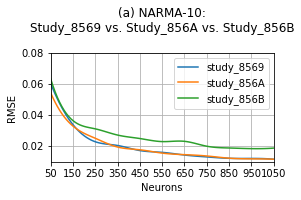

In [99]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(a) NARMA-10:\nStudy_8569 vs. Study_856A vs. Study_856B\n')
plt.show()

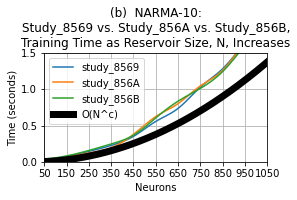

In [102]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b)  NARMA-10:\nStudy_8569 vs. Study_856A vs. Study_856B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

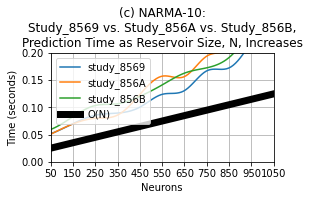

In [103]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.20])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10:\nStudy_8569 vs. Study_856A vs. Study_856B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_8569 optimized model

In [492]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo5TimeTrain = pd.DataFrame()
plotInfo5TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo5TimeTrain = pd.concat((plotInfo5TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo5TimePredict = pd.concat((plotInfo5TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [493]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo5TimeTrain = plotInfo5TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo5TimePredict = plotInfo5TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

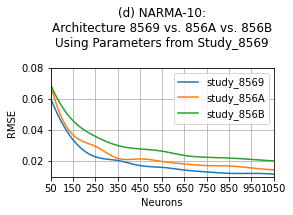

In [528]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(d) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_8569\n')
plt.show()

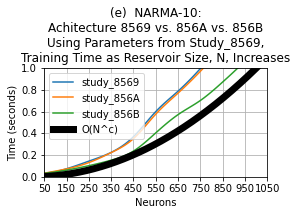

In [540]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e)  NARMA-10:\nAchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_8569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

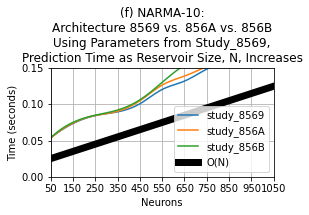

In [530]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_8569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_856A optimized model

In [514]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo6TimeTrain = pd.DataFrame()
plotInfo6TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo6TimeTrain = pd.concat((plotInfo6TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo6TimePredict = pd.concat((plotInfo6TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [515]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo6TimeTrain = plotInfo6TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo6TimePredict = plotInfo6TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

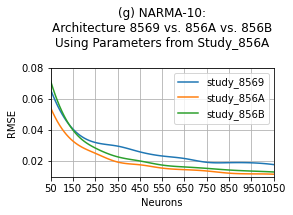

In [531]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856A\n')
plt.show()

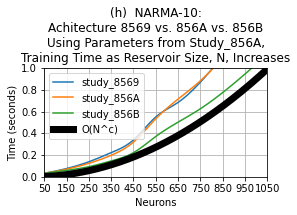

In [535]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000009*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h)  NARMA-10:\nAchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856A,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

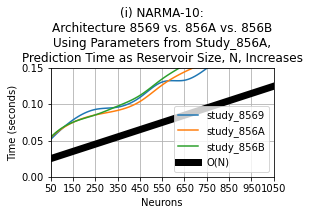

In [536]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856A,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_846B optimized model

In [504]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo7TimeTrain = pd.DataFrame()
plotInfo7TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo7TimeTrain = pd.concat((plotInfo7TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo7TimePredict = pd.concat((plotInfo7TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [505]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo7TimeTrain = plotInfo7TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo7TimePredict = plotInfo7TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

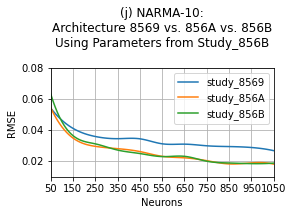

In [537]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(j) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856B\n')
plt.show()

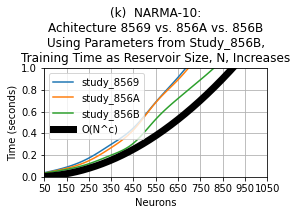

In [538]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(k)  NARMA-10:\nAchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

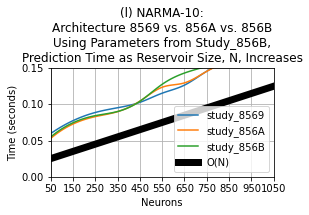

In [539]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## What parameters are controlling the influence of the distribution?

### spectral radius

In [495]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo28= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo28TimeTrain = pd.DataFrame()
plotInfo28TimePredict = pd.DataFrame()


i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    print(p)
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo28 =            pd.concat((plotInfo28, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo28TimeTrain =   pd.concat((plotInfo28TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo28TimePredict = pd.concat((plotInfo28TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8569
0.8800335099405139
study_856A
0.9057390526428688
study_856B
0.9972966507887525


In [496]:
plotInfo28 =            plotInfo28.rename(columns={"0": "study_8569 SR", "1": "study_856A SR", "2": "study_856B SR"})
plotInfo28TimeTrain =   plotInfo28TimeTrain.rename(columns={"0": "study_8569 SR", "1": "study_856A SR", "2": "study_856B SR"})
plotInfo28TimePredict = plotInfo28TimePredict.rename(columns={"0": "study_8569 SR", "1": "study_856A SR", "2": "study_856B SR"})

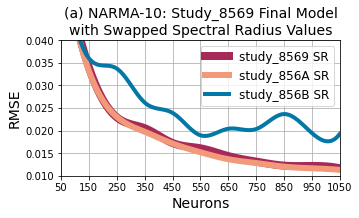

In [503]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo28.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_8569 Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.04])
plt.grid()
plt.show()

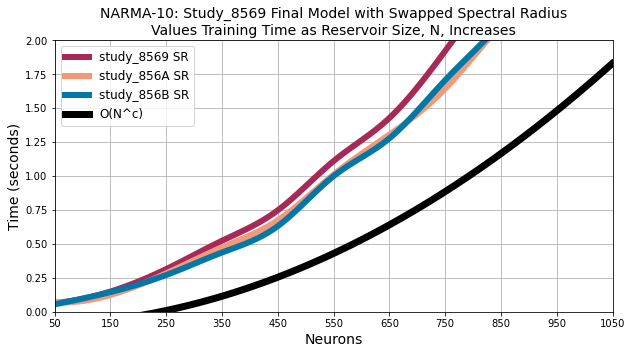

In [498]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo28TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28TimeTrain.columns[col], color=colors[col], linewidth=6)
    
n = np.arange(1,1050)
exponential = 0.00000175*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: Study_8569 Final Model with Swapped Spectral Radius\nValues Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

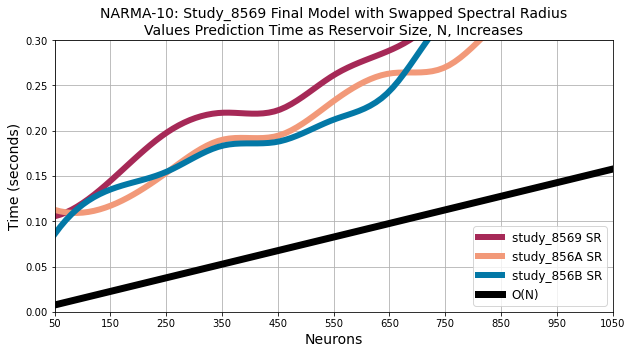

In [499]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo28TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28TimePredict.columns[col], color=colors[col], linewidth=6)
    
n = np.arange(1,1550)
orderOfN = (0.00015*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: Study_8569 Final Model with Swapped Spectral Radius\nValues Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [479]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo29= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo29TimeTrain = pd.DataFrame()
plotInfo29TimePredict = pd.DataFrame()


i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
p = studies.iloc[i,2].params['p']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    N = 50
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N=50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo29 =            pd.concat((plotInfo29, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo29TimeTrain =   pd.concat((plotInfo29TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo29TimePredict = pd.concat((plotInfo29TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8569
0.06397198041280111
0.14097092946370443
0.2728328364236014
0.44739062445504324
0.6734630380358014
0.9869202613830567
1.2801654815673829
1.6781314952032906
2.0712868690490724
2.679396867752075
3.101196765899658
study_856A
0.05243223508199056
0.14742108753749303
0.2559492758342198
0.4289549078260149
0.6343282120568412
0.9717032591501872
1.3411362330118815
1.650466067450387
2.08300838470459
2.561684693608965
3.084103379930769
study_856B
0.06288267771402994
0.14009594917297363
0.2649612937654768
0.4180774688720703
0.6105630397796631
0.9275900046030681
1.2927542073386056
1.6555234704698836
2.1314738909403483
2.5929782072703045
3.12975059236799


In [480]:
plotInfo29 =            plotInfo29.rename(columns={"0": "study_8569 LR", "1": "study_856A LR", "2": "study_856B LR"})
plotInfo29TimeTrain =   plotInfo29TimeTrain.rename(columns={"0": "study_8569 LR", "1": "study_856A LR", "2": "study_856B LR"})
plotInfo29TimePredict = plotInfo29TimePredict.rename(columns={"0": "study_8569 LR", "1": "study_856A LR", "2": "study_856B LR"})

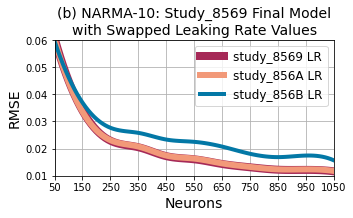

In [500]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo29.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) NARMA-10: Study_8569 Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.06])
plt.grid()
plt.show()

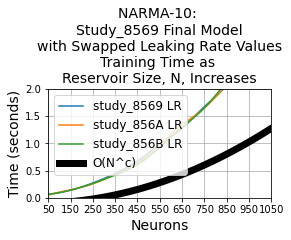

In [482]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo29TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_8569 Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

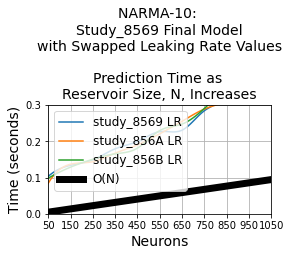

In [483]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo29TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_8569 Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [448]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo30= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo30TimeTrain = pd.DataFrame()
plotInfo30TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo30 =            pd.concat((plotInfo30, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo30TimeTrain =   pd.concat((plotInfo30TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo30TimePredict = pd.concat((plotInfo30TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8569
study_856A
study_856B


In [449]:
plotInfo30 =            plotInfo30.rename(columns={"0": "study_8569 dW", "1": "study_856A dW", "2": "study_856B dW"})
plotInfo30TimeTrain =   plotInfo30TimeTrain.rename(columns={"0": "study_8569 dW", "1": "study_856A dW", "2": "study_856B dW"})
plotInfo30TimePredict = plotInfo30TimePredict.rename(columns={"0": "study_8569 dW", "1": "study_856A dW", "2": "study_856B dW"})

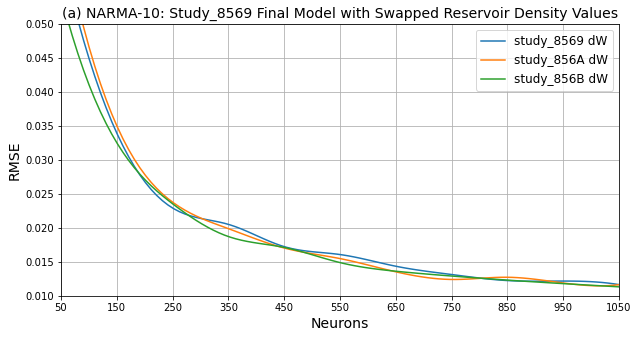

In [450]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo30.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_8569 Final Model with Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.05])
plt.grid()
plt.show()

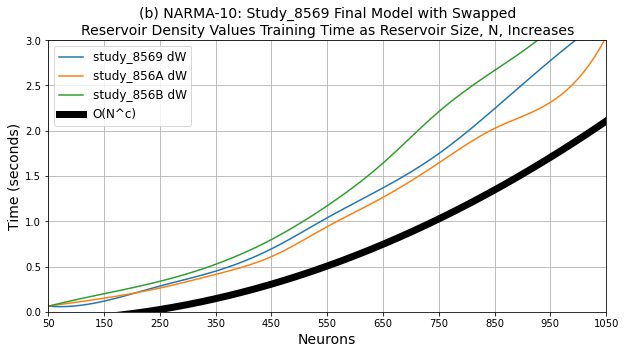

In [510]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo30TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,3])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) NARMA-10: Study_8569 Final Model with Swapped\nReservoir Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

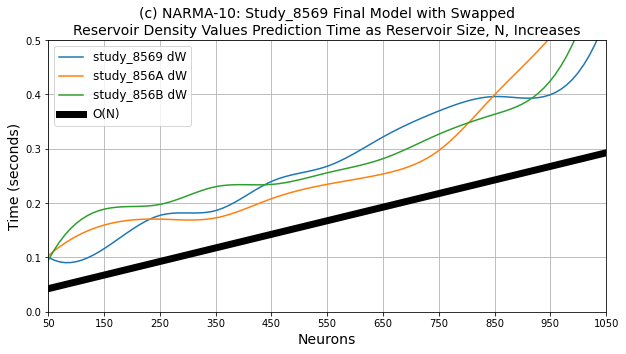

In [519]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo30TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00025*n)+0.03
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: Study_8569 Final Model with Swapped\nReservoir Density Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [453]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo31= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo31TimeTrain = pd.DataFrame()
plotInfo31TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo31 =            pd.concat((plotInfo31, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo31TimeTrain =   pd.concat((plotInfo31TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo31TimePredict = pd.concat((plotInfo31TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8569
study_856A
study_856B


In [454]:
plotInfo31 =            plotInfo31.rename(columns={"0": "study_8569 dWin", "1": "study_856A dWin", "2": "study_856B dWin"})
plotInfo31TimeTrain =   plotInfo31TimeTrain.rename(columns={"0": "study_8569 dWin", "1": "study_856A dWin", "2": "study_856B dWin"})
plotInfo31TimePredict = plotInfo31TimePredict.rename(columns={"0": "study_8569 dWin", "1": "study_856A dWin", "2": "study_856B dWin"})

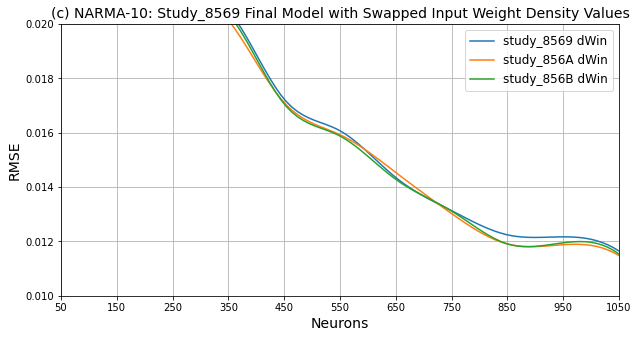

In [536]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo31.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) NARMA-10: Study_8569 Final Model with Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.02])
plt.grid()
plt.show()

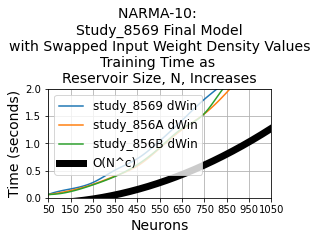

In [456]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo31TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_8569 Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

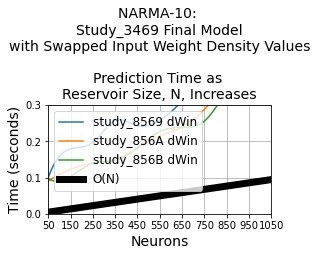

In [457]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo31TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [458]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo32= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo32TimeTrain = pd.DataFrame()
plotInfo32TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo32 =            pd.concat((plotInfo32, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo32TimeTrain =   pd.concat((plotInfo32TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo32TimePredict = pd.concat((plotInfo32TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8569
study_856A
study_856B


In [459]:
plotInfo32 =            plotInfo32.rename(columns={"0": "study_8569 sin", "1": "study_856A sin", "2": "study_856B sin"})
plotInfo32TimeTrain =   plotInfo32TimeTrain.rename(columns={"0": "study_8569 sin", "1": "study_856A sin", "2": "study_856B sin"})
plotInfo32TimePredict = plotInfo32TimePredict.rename(columns={"0": "study_8569 sin", "1": "study_856A sin", "2": "study_856B sin"})

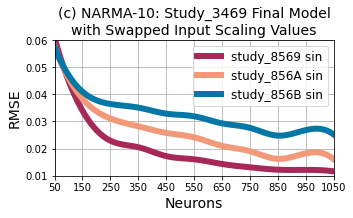

In [501]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo32.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32.columns[col] ,color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) NARMA-10: Study_3469 Final Model\nwith Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.06])
plt.grid()
plt.show()

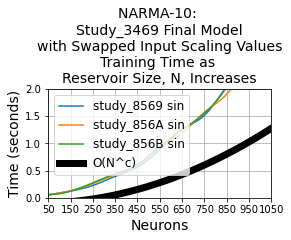

In [461]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo32TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

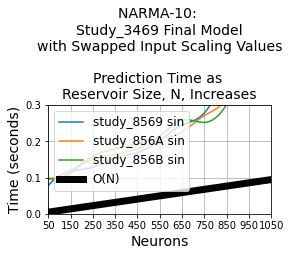

In [462]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo32TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [463]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo33= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo33TimeTrain = pd.DataFrame()
plotInfo33TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo33 =            pd.concat((plotInfo33, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo33TimeTrain =   pd.concat((plotInfo33TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo33TimePredict = pd.concat((plotInfo33TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8569
study_856A
study_856B


In [464]:
plotInfo33 =            plotInfo33.rename(columns={"0": "study_8569 Beta", "1": "study_856A Beta", "2": "study_856B Beta"})
plotInfo33TimeTrain =   plotInfo33TimeTrain.rename(columns={"0": "study_8569 Beta", "1": "study_856A Beta", "2": "study_856B Beta"})
plotInfo33TimePredict = plotInfo33TimePredict.rename(columns={"0": "study_8569 Beta", "1": "study_856A Beta", "2": "study_856B Beta"})

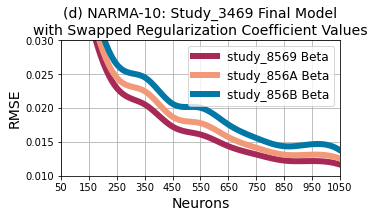

In [505]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo33.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33.columns[col], color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) NARMA-10: Study_3469 Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.03])
plt.grid()
plt.show()

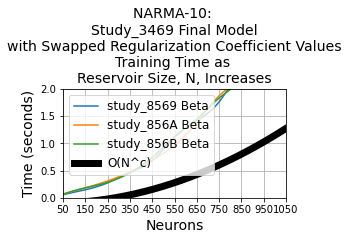

In [466]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo33TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

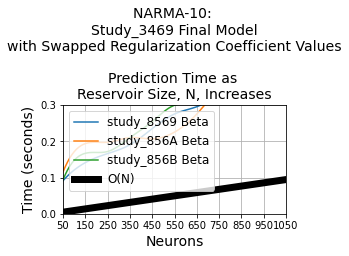

In [467]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo33TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

## How did the parameters vary between the models with different connections?

In [560]:
print(studies.loc[studies.iloc[:,0] == 'study_1469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_1469'].iloc[0,2].params

study_1469


{'p': 0.9995278165648598,
 'a': 0.9992022508413905,
 'dw': 0.6900523668340726,
 'din': 0.42375994521891847,
 'sin': 1.218842573437632,
 'B': 0.0012541732376229735}

In [561]:
print(studies.loc[studies.iloc[:,0] == 'study_2469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_2469'].iloc[0,2].params

study_2469


{'p': 0.9693466608948665,
 'a': 0.883062661982362,
 'dw': 0.2547448601246535,
 'din': 0.21142438768079586,
 'sin': 1.3722078390559793,
 'B': 0.0010058530959217659}

In [562]:
print(studies.loc[studies.iloc[:,0] == 'study_3469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_3469'].iloc[0,2].params

study_3469


{'p': 0.909308207037915,
 'a': 0.9996309516952484,
 'dw': 0.32140439694068756,
 'din': 0.9205723136968145,
 'sin': 0.4975669769214306,
 'B': 0.0010079864338779004}

In [563]:
print(studies.loc[studies.iloc[:,0] == 'study_8469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_8469'].iloc[0,2].params

study_8469


{'p': 0.975054697724155,
 'a': 0.9421737183892908,
 'dw': 0.05516066431710226,
 'din': 0.2783764695422861,
 'sin': 1.1778127066496846,
 'B': 0.0010046208482548883}

#### Plotted each Model w/ Different Parameters/Distribution

In [188]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo8= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo8TimeTrain = pd.DataFrame()
plotInfo8TimePredict = pd.DataFrame()

while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    #uConn = False
    #yConn = False
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
        #yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo8TimeTrain = pd.concat((plotInfo8TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo8TimePredict = pd.concat((plotInfo8TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [189]:
plotInfo8 = plotInfo8.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo8TimeTrain = plotInfo8TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo8TimePredict = plotInfo8TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

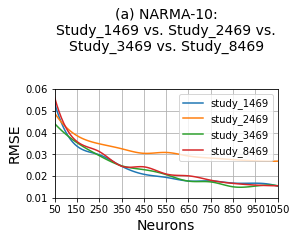

In [204]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.06])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(a) NARMA-10:\nStudy_1469 vs. Study_2469 vs.\nStudy_3469 vs. Study_8469\n\n', fontsize=14)
plt.show()

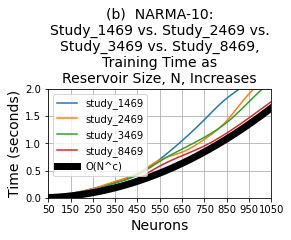

In [203]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b)  NARMA-10:\nStudy_1469 vs. Study_2469 vs.\nStudy_3469 vs. Study_8469,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

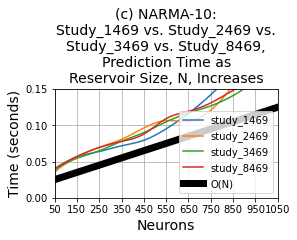

In [206]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10:\nStudy_1469 vs. Study_2469 vs.\nStudy_3469 vs. Study_8469,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Using the same set of parameters, does varying the connection impair the model's ability to perform?

In [130]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo9= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo9TimeTrain = pd.DataFrame()
plotInfo9TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo9 = pd.concat((plotInfo9, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo9TimeTrain = pd.concat((plotInfo9TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo9TimePredict = pd.concat((plotInfo9TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

IndexError: index 4 is out of bounds for axis 0 with size 4

In [111]:
plotInfo9 = plotInfo9.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo9TimeTrain = plotInfo9TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo9TimePredict = plotInfo9TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

In [112]:
plotInfo9.head()

study_1469  study_2469  study_3469  study_8469
0    0.053600    0.053928    0.049795    0.050251
1    0.033776    0.033810    0.031183    0.031222
2    0.029811    0.029817    0.025742    0.025749
3    0.024538    0.024540    0.020599    0.020606
4    0.020817    0.020818    0.016697    0.016698

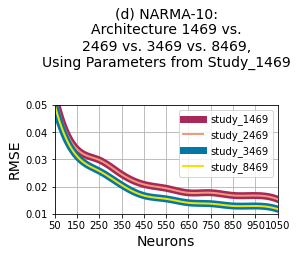

In [122]:
#add to plot
plt.figure(figsize=(4, 2))
changeWidth = 7
size = plotInfo9.shape[1]
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,int(size / 2)):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 5
    
changeWidth = 7
for col in range(int(size / 2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth- 5

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(d) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_1469\n\n', fontsize=14)
plt.show()

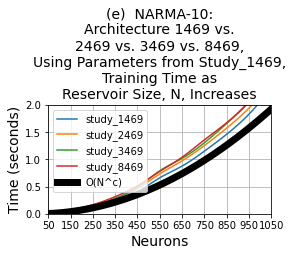

In [121]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000175*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e)  NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_1469,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

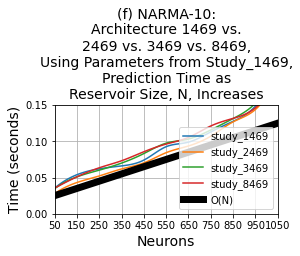

In [123]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_1469,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [137]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo10= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo10TimeTrain = pd.DataFrame()
plotInfo10TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo10 = pd.concat((plotInfo10, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo10TimeTrain = pd.concat((plotInfo10TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo10TimePredict = pd.concat((plotInfo10TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [138]:
plotInfo10 = plotInfo10.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo10TimeTrain = plotInfo10TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo10TimePredict = plotInfo10TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

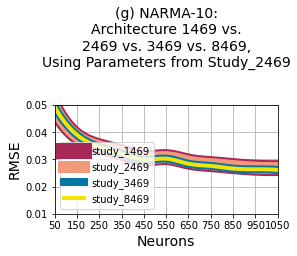

In [140]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 16
for col in range(0,plotInfo10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10.columns[col], color=colors[col], linewidth = changeWidth)
    changeWidth = changeWidth - 4

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(g) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_2469\n\n', fontsize=14)
plt.show()

In [565]:
plotInfo10

study_1469  study_2469  study_3469  study_8469
0     0.048989    0.049021    0.049404    0.049436
1     0.038584    0.038596    0.039039    0.039050
2     0.034838    0.034842    0.034612    0.034619
3     0.032568    0.032570    0.032079    0.032082
4     0.030452    0.030453    0.029920    0.029921
5     0.030854    0.030854    0.030278    0.030278
6     0.029214    0.029215    0.028418    0.028418
7     0.028276    0.028277    0.027610    0.027610
8     0.027560    0.027560    0.026652    0.026652
9     0.026969    0.026969    0.026384    0.026384
10    0.026845    0.026846    0.026149    0.026149

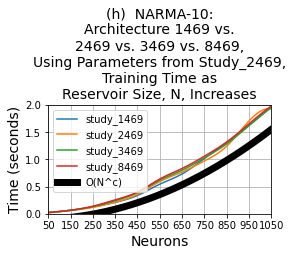

In [146]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h)  NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_2469,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

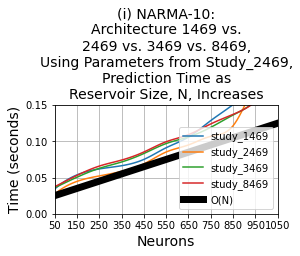

In [142]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_2469,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [163]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo11= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo11TimeTrain = pd.DataFrame()
plotInfo11TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo11 = pd.concat((plotInfo11, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo11TimeTrain = pd.concat((plotInfo11TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo11TimePredict = pd.concat((plotInfo11TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [164]:
plotInfo11 = plotInfo11.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo11TimeTrain = plotInfo11TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo11TimePredict = plotInfo11TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

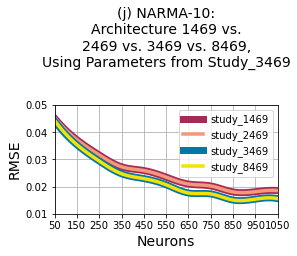

In [165]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo11.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(j) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_3469\n\n', fontsize=14)
plt.show()

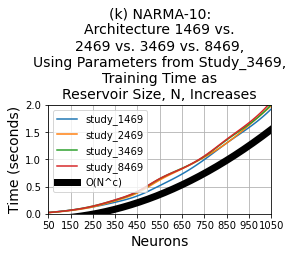

In [193]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_3469,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

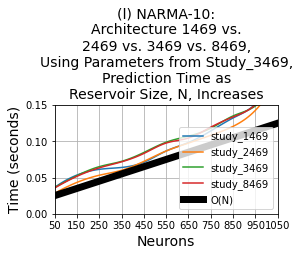

In [167]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_3469,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [195]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo12= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo12TimeTrain = pd.DataFrame()
plotInfo12TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    print(studies.iloc[i,0])
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo12 = pd.concat((plotInfo12, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo12TimeTrain = pd.concat((plotInfo12TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo12TimePredict = pd.concat((plotInfo12TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_8469
study_8469
study_8469
study_8469


In [196]:
plotInfo12 = plotInfo12.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo12TimeTrain = plotInfo12TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo12TimePredict = plotInfo12TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

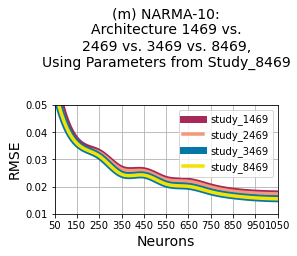

In [197]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo12.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(m) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_8469\n\n', fontsize=14)
plt.show()

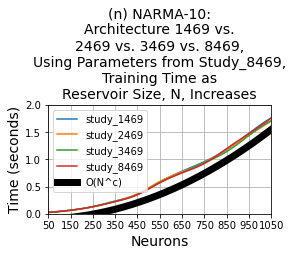

In [198]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(n) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_8469,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

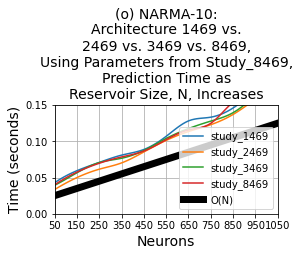

In [199]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_8469,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters are controlling the influence of the connections

### spectral radius

In [579]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo16= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo16TimeTrain = pd.DataFrame()
plotInfo16TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo16 = pd.concat((plotInfo16, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo16TimeTrain = pd.concat((plotInfo16TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo16TimePredict = pd.concat((plotInfo16TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_1469
study_2469
study_3469
study_8469


In [580]:
plotInfo16 =            plotInfo16.rename(columns={"0": "study_1469 SR", "1": "study_2469 SR", "2": "study_3469 SR", "3": "study_8469 SR"})
plotInfo16TimeTrain =   plotInfo16TimeTrain.rename(columns={"0": "study_1469 SR", "1": "study_2469 SR", "2": "study_3469 SR", "3": "study_8469 SR"})
plotInfo16TimePredict = plotInfo16TimePredict.rename(columns={"0": "study_1469 SR", "1": "study_2469 SR", "2": "study_3469 SR", "3": "study_8469 SR"})

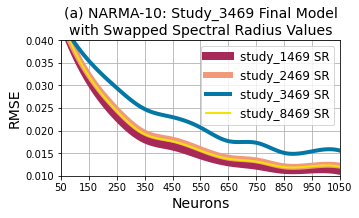

In [581]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo16.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_3469 Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.04])
plt.grid()
plt.show()

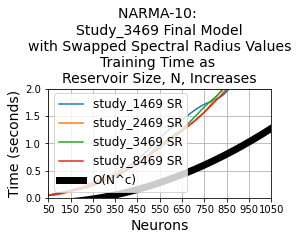

In [547]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

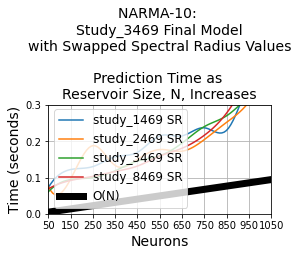

In [548]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Spectral Radius Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [224]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo17= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo17TimeTrain = pd.DataFrame()
plotInfo17TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    N = 50
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo17 =            pd.concat((plotInfo17, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo17TimeTrain =   pd.concat((plotInfo17TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo17TimePredict = pd.concat((plotInfo17TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_1469
0.02343266805013021
0.06699295043945312
0.13762617111206055
0.23106584548950196
0.39211174647013347
0.6343330996377128
0.8345171292622884
1.009346604347229
1.2775379078728812
1.460730607693012
1.800096050898234
study_2469
0.022258488337198894
0.06166505813598633
0.12443342208862304
0.22249358495076496
0.3593696117401123
0.5867637736456734
0.7809320290883383
0.9935260670525687
1.2209466184888567
1.497942021914891
1.8289037091391427
study_3469
0.022125418980916342
0.06274223327636719
0.12531383832295737
0.22126299540201824
0.3694470405578613
0.604508808680943
0.7906954765319825
1.0000100306102209
1.2513830491474696
1.5108120624835675
1.871540323893229
study_8469
0.02228074073791504
0.06295270919799804
0.12645470301310222
0.23714601198832194
0.4068851629892985
0.6173487809988168
0.7911091645558676
1.0120445319584437
1.2593305746714274
1.545353923525129
1.8709860483805338


In [227]:
plotInfo17 =            plotInfo17.rename(columns={"0": "study_1469 LR", "1": "study_2469 LR", "2": "study_3469 LR", "3": "study_8469 LR"})
plotInfo17TimeTrain =   plotInfo17TimeTrain.rename(columns={"0": "study_1469 LR", "1": "study_2469 LR", "2": "study_3469 LR", "3": "study_8469 LR"})
plotInfo17TimePredict = plotInfo17TimePredict.rename(columns={"0": "study_1469 LR", "1": "study_2469 LR", "2": "study_3469 LR", "3": "study_8469 LR"})

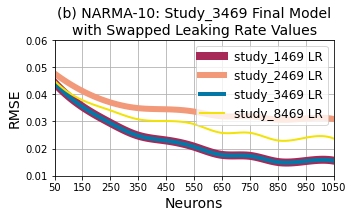

In [549]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo17.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) NARMA-10: Study_3469 Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.06])
plt.grid()
plt.show()

In [564]:
plotInfo17

study_1469 LR  study_2469 LR  study_3469 LR  study_8469 LR
0        0.044178       0.047630       0.044179       0.044995
1        0.035407       0.041199       0.035388       0.037817
2        0.029443       0.036999       0.029405       0.034071
3        0.024774       0.034893       0.024733       0.030771
4        0.022996       0.034470       0.022950       0.030146
5        0.020711       0.033628       0.020664       0.029004
6        0.017691       0.031899       0.017656       0.025780
7        0.017341       0.031906       0.017301       0.025814
8        0.015082       0.030666       0.015055       0.023006
9        0.015427       0.031110       0.015395       0.024012
10       0.015593       0.030915       0.015561       0.023732

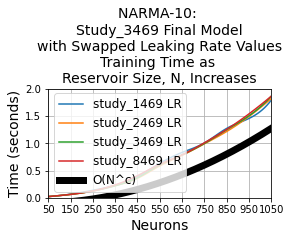

In [274]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo17TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

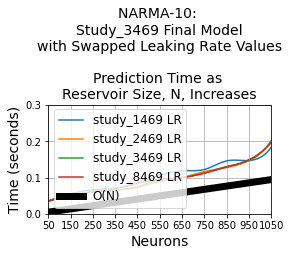

In [275]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo17TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [228]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo18= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo18TimeTrain = pd.DataFrame()
plotInfo18TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo18 =            pd.concat((plotInfo18, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo18TimeTrain =   pd.concat((plotInfo18TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo18TimePredict = pd.concat((plotInfo18TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_1469
study_2469
study_3469
study_8469


In [229]:
plotInfo18 =            plotInfo18.rename(columns={"0": "study_1469 dW", "1": "study_2469 dW", "2": "study_3469 dW", "3": "study_8469 dW"})
plotInfo18TimeTrain =   plotInfo18TimeTrain.rename(columns={"0": "study_1469 dW", "1": "study_2469 dW", "2": "study_3469 dW", "3": "study_8469 dW"})
plotInfo18TimePredict = plotInfo18TimePredict.rename(columns={"0": "study_1469 dW", "1": "study_2469 dW", "2": "study_3469 dW", "3": "study_8469 dW"})

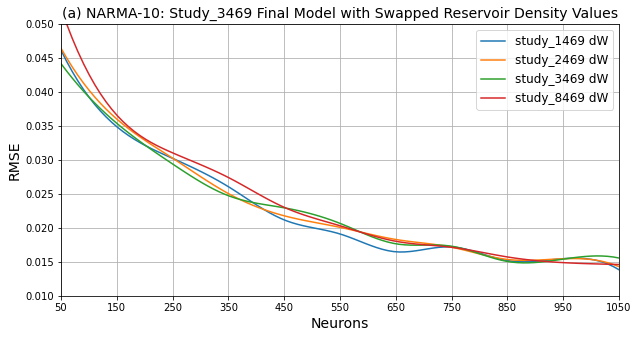

In [339]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo18.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_3469 Final Model with Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.05])
plt.grid()
plt.show()

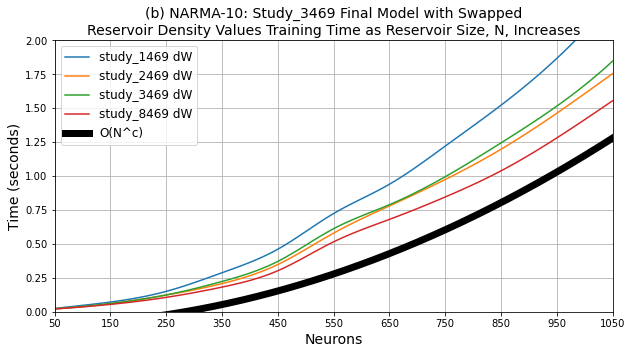

In [340]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo18TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) NARMA-10: Study_3469 Final Model with Swapped\nReservoir Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

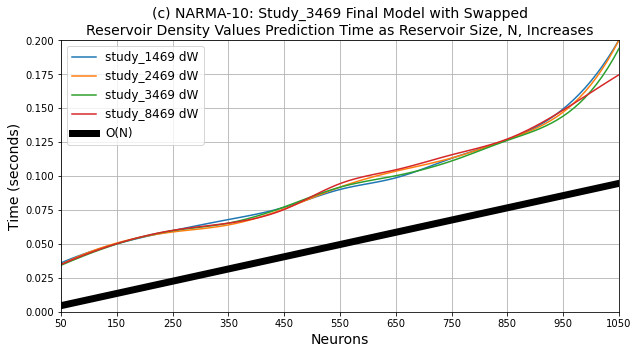

In [341]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo18TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: Study_3469 Final Model with Swapped\nReservoir Density Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [230]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo19= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo19TimeTrain = pd.DataFrame()
plotInfo19TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
sin = studies.iloc[i,2].params['sin']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo19 =            pd.concat((plotInfo19, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo19TimeTrain =   pd.concat((plotInfo19TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo19TimePredict = pd.concat((plotInfo19TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_1469
study_2469
study_3469
study_8469


In [282]:
plotInfo19 =            plotInfo19.rename(columns={"0": "study_1469 dWin", "1": "study_2469 dWin", "2": "study_3469 dWin", "3": "study_8469 dWin"})
plotInfo19TimeTrain =   plotInfo19TimeTrain.rename(columns={"0": "study_1469 dWin", "1": "study_2469 dWin", "2": "study_3469 dWin", "3": "study_8469 dWin"})
plotInfo19TimePredict = plotInfo19TimePredict.rename(columns={"0": "study_1469 dWin", "1": "study_2469 dWin", "2": "study_3469 dWin", "3": "study_8469 dWin"})

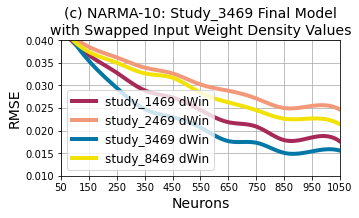

In [557]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo19.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19.columns[col], color=colors[col], linewidth = 4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) NARMA-10: Study_3469 Final Model\nwith Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.04])
plt.grid()
plt.show()

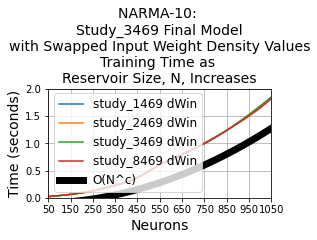

In [285]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo19TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

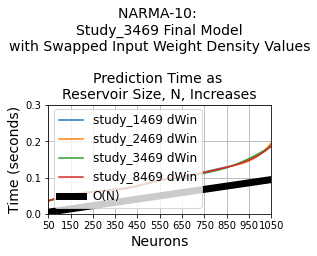

In [286]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo19TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [232]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo20= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo20TimeTrain = pd.DataFrame()
plotInfo20TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo20 =            pd.concat((plotInfo20, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo20TimeTrain =   pd.concat((plotInfo20TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo20TimePredict = pd.concat((plotInfo20TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_1469
study_2469
study_3469
study_8469


In [233]:
plotInfo20 =            plotInfo20.rename(columns={"0": "study_1469 sin", "1": "study_2469 sin", "2": "study_3469 sin", "3": "study_8469 sin"})
plotInfo20TimeTrain =   plotInfo20TimeTrain.rename(columns={"0": "study_1469 sin", "1": "study_2469 sin", "2": "study_3469 sin", "3": "study_8469 sin"})
plotInfo20TimePredict = plotInfo20TimePredict.rename(columns={"0": "study_1469 sin", "1": "study_2469 sin", "2": "study_3469 sin", "3": "study_8469 sin"})

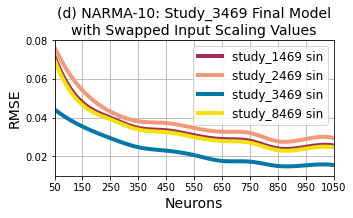

In [556]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo20.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20.columns[col], color=colors[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) NARMA-10: Study_3469 Final Model\nwith Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.08])
plt.grid()
plt.show()

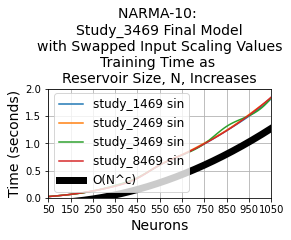

In [289]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

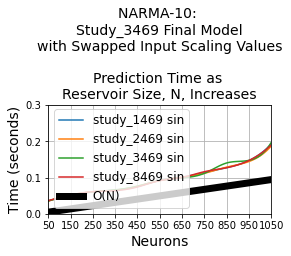

In [290]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [234]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo21= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo21TimeTrain = pd.DataFrame()
plotInfo21TimePredict = pd.DataFrame()

#3469
i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
sin = studies.iloc[i,2].params['sin']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo21 =            pd.concat((plotInfo21, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo21TimeTrain =   pd.concat((plotInfo21TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo21TimePredict = pd.concat((plotInfo21TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_1469
study_2469
study_3469
study_8469


In [235]:
plotInfo21 =            plotInfo21.rename(columns={"0": "study_1469 Beta", "1": "study_2469 Beta", "2": "study_3469 Beta", "3": "study_8469 Beta"})
plotInfo21TimeTrain =   plotInfo21TimeTrain.rename(columns={"0": "study_1469 Beta", "1": "study_2469 Beta", "2": "study_3469 Beta", "3": "study_8469 Beta"})
plotInfo21TimePredict = plotInfo21TimePredict.rename(columns={"0": "study_1469 Beta", "1": "study_2469 Beta", "2": "study_3469 Beta", "3": "study_8469 Beta"})

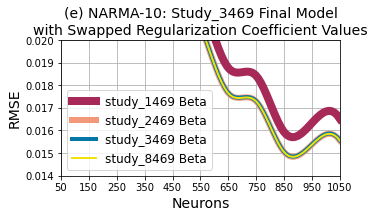

In [563]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
for col in range(0,plotInfo21.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(e) NARMA-10: Study_3469 Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.014,0.02])
plt.grid()
plt.show()

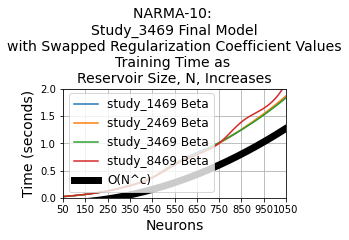

In [293]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo21TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

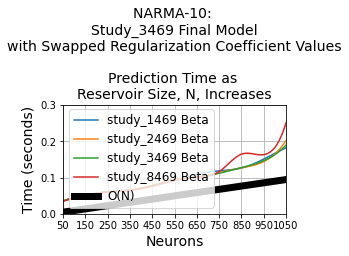

In [294]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo21TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('NARMA-10: \nStudy_3469 Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# What readout activation is best?

In [8]:
print(studies.loc[studies.iloc[:,0] == 'study_846A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_846A'].iloc[0,2].params

study_846A


{'p': 0.9623703974186318,
 'a': 0.9636170130644843,
 'dw': 0.17002720892424028,
 'din': 0.5031928169134054,
 'sin': 0.3834702083793958,
 'B': 0.008288677950781613}

In [9]:
print(studies.loc[studies.iloc[:,0] == 'study_847A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_847A'].iloc[0,2].params

study_847A


{'p': 0.9996455662425757,
 'a': 0.9992001488520537,
 'dw': 0.18773694021621495,
 'din': 0.6765576904772962,
 'sin': 0.39127614150835194,
 'B': 0.0015684989157757467}

## Models that scored very similar, but used different activation function

In [11]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo14 = pd.DataFrame()
plotInfo14TimeTrain = pd.DataFrame()
plotInfo14TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo14 = pd.concat((plotInfo14, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimeTrain = pd.concat((plotInfo14TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimePredict = pd.concat((plotInfo14TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

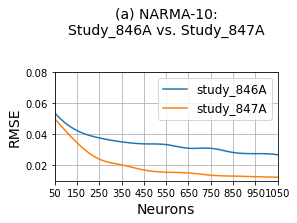

In [105]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) NARMA-10:\nStudy_846A vs. Study_847A\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.08])
plt.grid()
plt.show()

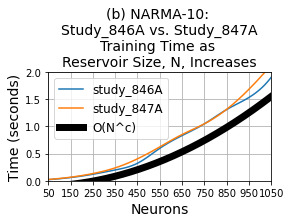

In [19]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) NARMA-10: \nStudy_846A vs. Study_847A\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

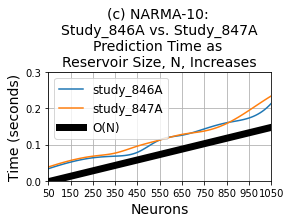

In [29]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00015*n)-0.01
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: \nStudy_846A vs. Study_847A\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [40]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo15 = pd.DataFrame()
plotInfo15TimeTrain = pd.DataFrame()
plotInfo15TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846A'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo15 = pd.concat((plotInfo15, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo15TimeTrain = pd.concat((plotInfo15TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo15TimePredict = pd.concat((plotInfo15TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_846A


In [41]:
plotInfo15 = plotInfo15.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo15TimeTrain = plotInfo15TimeTrain.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo15TimePredict = plotInfo15TimePredict.rename(columns={"0": "study_846A", "1": "study_847A"})

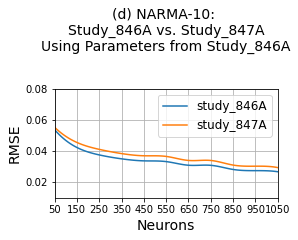

In [106]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) NARMA-10: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_846A\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.08])
plt.grid()
plt.show()

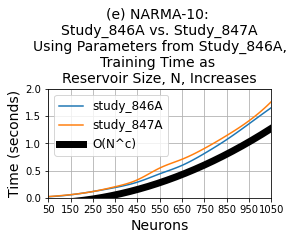

In [49]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) NARMA-10: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_846A,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

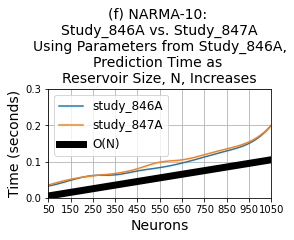

In [51]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_846A,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [468]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo16 = pd.DataFrame()
plotInfo16TimeTrain = pd.DataFrame()
plotInfo16TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847A'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo16 = pd.concat((plotInfo16, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo16TimeTrain = pd.concat((plotInfo16TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo16TimePredict = pd.concat((plotInfo16TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_847A


In [469]:
plotInfo16 = plotInfo16.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo16TimeTrain = plotInfo16TimeTrain.rename(columns={"0": "study_846A", "1": "study_847A"})
plotInfo16TimePredict = plotInfo16TimePredict.rename(columns={"0": "study_846A", "1": "study_847A"})

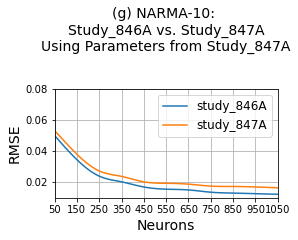

In [470]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(g) NARMA-10: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_847A\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.08])
plt.grid()
plt.show()

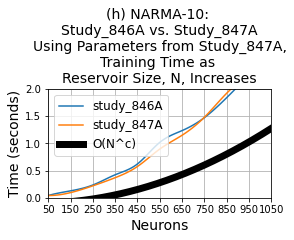

In [473]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) NARMA-10: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_847A,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

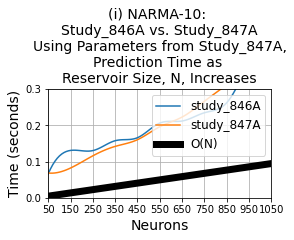

In [472]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10: \nStudy_846A vs. Study_847A\nUsing Parameters from Study_847A,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()